# Titanic

In [236]:
#Pandas is for dataframe manipulation
import pandas as pd 
#Scikit learn is used to build the model. It has various libraries like linear regression, decision tree etc.
from sklearn.linear_model import LogisticRegression
import numpy as np 
# import matplotlib.pyplot as plt #I did not use this
from sklearn.preprocessing import StandardScaler #used for standardization (sometimes called Z-score normalization)
# from sklearn.model_selection import train_test_split # Do not need this with the multiple datasets kaggle has given

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score


In [237]:
#load the data into dataframes
#data retrieved from kaggle competitions
train = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

In [238]:
#will focus on train data for now. 
gender_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [239]:
#Merge the gender_submission database and the test_df database since they were given by kaggle
#but contain incomplete data in comparision to the train dataframe. This merge consolidates for further manipulation
test = pd.merge(test_df, gender_submission, on = "PassengerId", how="inner")
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


Going to need to apply any column changes to test and train. gender_submissions will be what we apply at the end with passenger IDs matching

In [240]:
# We need to turn the Pclass into its own columns in order to get a better prediction on who will be in what class
train['FirstClass'] = train.Pclass.apply(lambda p: 1 if p == 1 else 0)
test['FirstClass'] = test.Pclass.apply(lambda p: 1 if p == 1 else 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [241]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,FirstClass
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0


In [242]:
# Now the same thing for second class and then again for third class people. 
# We need to turn the Pclass into its own columns in order to get a better prediction on who will be in what class
train['SecondClass'] = train.Pclass.apply( lambda p: 1 if p == 2 else 0)
test['SecondClass'] = test.Pclass.apply( lambda p: 1 if p == 2 else 0)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,1


In [243]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,FirstClass,SecondClass
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0


In [244]:
train['ThirdClass'] = train.Pclass.apply( lambda p: 1 if p == 3 else 0)
test['ThirdClass'] = test.Pclass.apply( lambda p: 1 if p == 3 else 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass,ThirdClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [245]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,FirstClass,SecondClass,ThirdClass
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,1


We know from stories of Titanic that women and children  can be saved in a life raft, but what about men? 
I think we should address gender and age next as it may help our model. 

In [246]:
# Let's make the sex cloumn into a binary column
train['Sex_binary'] = train.Sex.map({"male": 0, "female": 1}) 
test['Sex_binary'] = test.Sex.map({"male": 0, "female": 1})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass,ThirdClass,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


I could of done this earlier, but in this data, I am not likely to use the following columns right now. I may need them later for further analysis but at present they are just cluttering up my dataset. Lets just drop them for now from each dataframe.

Pclass, Name, SibSp, Parch, Ticket, Fare, Cabin, Embarked

In [247]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FirstClass,SecondClass,ThirdClass,Sex_binary
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.034303,-0.000086,-0.029486,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.285904,0.093349,-0.322308,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.885924,-0.188432,0.916673,-0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.348941,0.006954,-0.312271,-0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.092548,0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.015790,0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.591711,-0.118557,-0.413333,0.182333
FirstClass,0.034303,0.285904,-0.885924,0.348941,-0.054582,-0.017633,0.591711,1.000000,-0.288585,-0.626738,0.098013
SecondClass,-0.000086,0.093349,-0.188432,0.006954,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,-0.565210,0.064746
ThirdClass,-0.029486,-0.322308,0.916673,-0.312271,0.092548,0.015790,-0.413333,-0.626738,-0.565210,1.000000,-0.137143


In [248]:
# columns_to_drop = ["Pclass", "Name", "Sex", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]
columns_to_drop = ["Pclass", "Name", "Sex",  "Ticket", "Cabin", "Embarked"]

train = train.drop(columns_to_drop, axis = 1)
test = test.drop(columns_to_drop, axis = 1)
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,FirstClass,SecondClass,ThirdClass,Sex_binary
0,1,0,22.0,1,0,7.2500,0,0,1,0
1,2,1,38.0,1,0,71.2833,1,0,0,1
2,3,1,26.0,0,0,7.9250,0,0,1,1
3,4,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0


In [249]:
train.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,FirstClass,SecondClass,ThirdClass,Sex_binary
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.352413
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.477990
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [250]:
train["Age"].count()
# we have 714 rows with an age. So we have some missing data. We have 891 rows 

714

## Types of missing data:
- **Missing Completely at Random (MCAR):** No pattern to the missingness.
- **Missing at Random (MAR):** Missingness might be related to other observed variables, but not the missing value itself.
- **Missing Not at Random (MNAR):** The missingness depends on the value of the missing data itself.

## Strategies for Handling Missing Values

- **Listwise Deletion:** Remove rows containing missing values. Use with caution, especially if you have a large number of missing entries, as you could lose valuable information.
- **Pairwise Deletion:** Utilize all available data, but computations might involve different subsets of data.
- **Imputation:** Fill in missing values with estimated substitutes. **Common methods:**
- **Mean/Median Imputation:** Replace missing values with the mean/median of the column. Suitable for numerical data.
- **Mode Imputation:** Replace missing categorical values with the most frequent category.
- **Predictive Modeling:** Create a model to predict missing values based on other variables. This can be more sophisticated.


This is an exert summary from google's Gemini

In [251]:
#Let's fill in the ages with the mean of all ages.
train['Age'].fillna(value = round(train['Age'].mean()), inplace = True) #look up .fillna function
test['Age'].fillna(value = round(test['Age'].mean()), inplace = True) 
train["Age"].count() #now we have every row accounted for. 

891

In [252]:
train.describe() 

,PassengerId,Survived,Age,SibSp,Parch,Fare,FirstClass,SecondClass,ThirdClass,Sex_binary
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.758889,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.352413
std,257.353842,0.486592,13.002570,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.477990
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


# Prepare the data
 We were given two datasets so we will split them accordingly. WIth one dataset we would use the train_test_split function from the model selection of sklearn. 

In [253]:
#I want to focus on training a model on Age, Sex_binary, FirstClass, SecondClass, ThirdClass, "SibSp", "Parch", "Fare"
#The goal is to predict whether or not the user survived based on this. 
train_features = train[["Age", "Sex_binary", "FirstClass", "SecondClass", "ThirdClass"]]
train_labels = train["Survived"]
test_features = test[["Age", "Sex_binary", "FirstClass", "SecondClass", "ThirdClass"]]
test_labels = gender_submission["Survived"]


Now we will normalize the data in preparation for loading and training the model. This allows all weighst to be evenly distriubted

In [254]:
# Scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()
train_features_norm = scaler.fit_transform(train_features)
test_features_norm = scaler.transform(test_features)

# Start Logistic Regression 

In [255]:
model = LogisticRegression()
model.fit(train_features_norm, train_labels)

LogisticRegression()

In [256]:
# print(model.score(train_features, train_labels)) #I Switched to the metric module for accuracy_score
y_predict = model.predict(test_features_norm)

LR_model_acc_score = accuracy_score(test_labels, y_predict)

print(f"Accuracy: {LR_model_acc_score}")

Accuracy: 0.9641148325358851


In [257]:
#lets see the coefficents -  Age, Sex_binary, FirstClass, SecondClass, ThirdClass 
print(model.coef_)


[[-0.42603339  1.23609343  0.54127538  0.062455   -0.51719478]]


Coefficients represent the relationship between each feature (variable) and the log-odds of the target event

A positive coefficient means that an increase in the feature's value is associated with a higher likelihood of survival.

A negative coefficient means that an increase in the feature's value is associated with a lower likelihood of survival.

- Age = -0.42603339 
- Sex_binary = 1.23609343      
- FirstClass = 0.54127538 
- SecondClass = 0.062455   
- ThirdClass = -0.51719478


In [258]:
#I remember when I did this 2 years ago, we used Jack and Rose then ourselves to make predictions on the model and we mad ethem in a np.array
Jack = np.array([20.0, 0.0, 0.0, 0.0, 1.0])
Rose = np.array([17.0, 1.0, 1.0, 0.0, 0.0])
Dom = np.array([29.0,  0.0, 0.0, 1.0, 0.0])

In [259]:
passenger_predict = np.array([Jack, Rose, Dom])

In [260]:
passenger_predict = scaler.transform(passenger_predict)

C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


That warning again?..

In [261]:
#prediction time! My favorite part
# Make survival predictions!
print(model.predict(passenger_predict)) #This will print a 1 or 0 for surivied or did not survive 
print(model.predict_proba(passenger_predict)) #this will give us how likely for each option

[0 1 0]
[[0.88542238 0.11457762]
 [0.05002647 0.94997353]
 [0.75873431 0.24126569]]


- Jack had an 88.5% of NOT surviving based on the data. 
- Rose had a 95% chance of surviving. 
- Dom would of had a 75.9% chance of NOT surviving.

# Start Decision Tree model

We have the option of using DecisionTreeClassifier or DecisionTreeRegressor.

We know that we are classifying whether or not someone survived so we should use the DecisionTreeClassifier. 

In [262]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [263]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [264]:
tree_model.fit(train_features, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [265]:
y_predict = tree_model.predict(test_features)

tree_model_acc_score = accuracy_score(test_labels, y_predict)

print(f"Accuracy: {tree_model_acc_score}")

Accuracy: 0.9569377990430622


In [266]:
# passenger_predict
print(tree_model.predict(passenger_predict))
print(tree_model.predict_proba(passenger_predict))

[1 0 1]
[[0.43333333 0.56666667]
 [0.5        0.5       ]
 [0.43333333 0.56666667]]


C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


We will interpret and comparer all results at the end

# Start Random Forest Classifier

In [267]:
from sklearn.ensemble import RandomForestClassifier

In [268]:
RFC_model = RandomForestClassifier(n_estimators=90, criterion='gini', max_depth=5)

In [269]:
RFC_model.fit(train_features, train_labels)

RandomForestClassifier(max_depth=5, n_estimators=90)

In [270]:
y_predict_RFC = RFC_model.predict(test_features)

In [271]:
#Now it should of predicted if it thinks the people in the test_features dataset survived. Lets compare that to our information of their actual survival rates
print("Accuracy:", accuracy_score(test_labels, y_predict_RFC))

Accuracy: 0.930622009569378


This was pretty accurate - 96%

In [272]:
# passenger_predict
print(RFC_model.predict(passenger_predict))
print(RFC_model.predict_proba(passenger_predict))

[1 0 1]
[[0.33239455 0.66760545]
 [0.62157264 0.37842736]
 [0.         1.        ]]


C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Next we will go over Naive Bayes for Classification


In [273]:
from sklearn.naive_bayes import GaussianNB

In [274]:
#We should not need to do much for this one
nb_model = GaussianNB()

In [275]:
nb_model.fit(train_features, train_labels)

GaussianNB()

In [276]:
y_predict_NB = nb_model.predict(test_features)

NB_acc_score = accuracy_score(test_labels, y_predict_NB)

print(f"Accuracy: {NB_acc_score}")

Accuracy: 0.8636363636363636


In [277]:
# passenger_predict
print(nb_model.predict(passenger_predict))
print(nb_model.predict_proba(passenger_predict))

[0 1 1]
[[9.13515943e-01 8.64840575e-02]
 [1.15605717e-06 9.99998844e-01]
 [1.83320812e-02 9.81667919e-01]]


C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Nueral Networks - Pytorch

In [278]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [279]:
#What version am I on?
torch.__version__

'1.12.1+cpu'

In [280]:
type(train_labels_pre_normalized)

pandas.core.series.Series

In [281]:
train_features_pre_normalized = train[["Age", "Sex_binary", "FirstClass", "SecondClass", "ThirdClass"]]
train_labels_pre_normalized = train["Survived"]
test_features_pre_normalized = test[["Age", "Sex_binary", "FirstClass", "SecondClass", "ThirdClass"]]
test_labels_pre_normalized = gender_submission["Survived"]

In [282]:
# Convert data to PyTorch tensors
train_features_pt = torch.tensor(train_features_pre_normalized.values).float()
# train_labels = torch.tensor(train_labels_pre_normalized.values).float()
test_features_pt = torch.tensor(test_features_pre_normalized.values).float()
# test_labels = torch.tensor(test_labels_pre_normalized.values).float()


# Convert labels to NumPy arrays
train_labels_np = train_labels.values
test_labels_np = test_labels.values

# Convert to PyTorch tensors with explicit dtype
train_labels_pt = torch.tensor(train_labels_np, dtype=torch.long)
test_labels_pt = torch.tensor(test_labels_np, dtype=torch.long)


# Create TensorDatasets
train_dataset = TensorDataset(train_features_pt, train_labels_pt)
test_dataset = TensorDataset(test_features_pt, test_labels_pt)

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [283]:
class TitanicNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TitanicNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define network dimensions
input_size = train_features_pt.shape[1]
hidden_size = 10  # You can adjust this
output_size = 2  # Two classes: Survived or Not Survived

# Create the network
PyTorchmodel = TitanicNN(input_size, hidden_size, output_size)


In [284]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(PyTorchmodel.parameters(), lr=0.001)


In [285]:
num_epochs = 100  # adjust this
losses = []

for epoch in range(num_epochs):
    epoch_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = PyTorchmodel(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    epoch_loss /= len(train_loader)
    losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}')


Epoch 1/100, Loss: 3.7406338112694875
Epoch 2/100, Loss: 3.0856626885277882
Epoch 3/100, Loss: 2.4728919693401883
Epoch 4/100, Loss: 1.8999298300061906
Epoch 5/100, Loss: 1.3899219802447729
Epoch 6/100, Loss: 0.9777692088059017
Epoch 7/100, Loss: 0.7446028419903347
Epoch 8/100, Loss: 0.6585983463696071
Epoch 9/100, Loss: 0.6364323667117527
Epoch 10/100, Loss: 0.625961354800633
Epoch 11/100, Loss: 0.6148393111569541
Epoch 12/100, Loss: 0.6057960944516319
Epoch 13/100, Loss: 0.597800612449646
Epoch 14/100, Loss: 0.5887058845588139
Epoch 15/100, Loss: 0.5788762441703251
Epoch 16/100, Loss: 0.5701849162578583
Epoch 17/100, Loss: 0.5574868151119777
Epoch 18/100, Loss: 0.5374627709388733
Epoch 19/100, Loss: 0.5273056881768363
Epoch 20/100, Loss: 0.5174076322998319
Epoch 21/100, Loss: 0.5081167370080948
Epoch 22/100, Loss: 0.5003981930868966
Epoch 23/100, Loss: 0.49509331583976746
Epoch 24/100, Loss: 0.4881301820278168
Epoch 25/100, Loss: 0.48461100246225086
Epoch 26/100, Loss: 0.478730071868

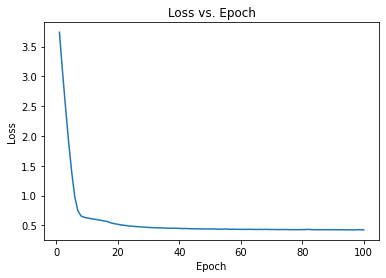

In [286]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.show()


In [287]:
PyTorchmodel.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = PyTorchmodel(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy on test set: {accuracy * 100}%')


Accuracy on test set: 95.69377990430623%


In [288]:
#Predict time!!
passenger_predict_tensor = torch.tensor(passenger_predict).float()

with torch.no_grad():
    outputs = PyTorchmodel(passenger_predict_tensor)
    probabilities = torch.softmax(outputs, dim=1)
    predictions = torch.argmax(probabilities, dim=1)

In [289]:
import numpy as np
# Set the PyTorchmodel to evaluation mode
PyTorchmodel.eval()

# Make predictions
with torch.no_grad():
    outputs = PyTorchmodel(passenger_predict_tensor)
    probabilities = torch.softmax(outputs, dim=1)
    predictions = torch.argmax(probabilities, dim=1)

# Convert predictions and probabilities to numpy arrays for easy printing
predictions_np = predictions.tolist()
probabilities_np = probabilities.tolist()

# Print results
print(predictions_np)
print(probabilities_np)


[1, 1, 1]
[[0.3783087432384491, 0.6216912269592285], [0.00014035450294613838, 0.9998595714569092], [0.027605177834630013, 0.9723948240280151]]


# Tensorflow 

In [290]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [294]:
# Convert data to TensorFlow tensors
train_features_tf = tf.convert_to_tensor(train_features.values, dtype=tf.float32)
train_labels_tf = tf.convert_to_tensor(train_labels.values, dtype=tf.int64)
test_features_tf = tf.convert_to_tensor(test_features.values, dtype=tf.float32)
test_labels_tf = tf.convert_to_tensor(test_labels.values, dtype=tf.int64)

# Define network dimensions
input_size = train_features_pt.shape[1]
hidden_size = 10  # You can adjust this
output_size = 2  # Two classes: Survived or Not Survived


In [295]:
# make the nn
model_tf = models.Sequential([
    layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)),
    layers.Dense(output_size, activation='softmax')
])


In [296]:
# compile the model here
model_tf.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])


In [297]:
#model train
history = model_tf.fit(train_features_tf, train_labels_tf, epochs=num_epochs, batch_size=batch_size, verbose=1)


Epoch 1/100
14/14 [==============================] - 1s 1ms/step - loss: 6.2456 - accuracy: 0.3838
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 4.9260 - accuracy: 0.3771
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 3.6276 - accuracy: 0.3737
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 2.3427 - accuracy: 0.3681
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 1.2267 - accuracy: 0.3547
Epoch 6/100
14/14 [==============================] - 0s 1ms/step - loss: 0.7365 - accuracy: 0.5264
Epoch 7/100
14/14 [==============================] - 0s 1ms/step - loss: 0.7135 - accuracy: 0.6195
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6998 - accuracy: 0.6195
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.6195
Epoch 10/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.6173
Epoch 11/

In [298]:
loss, accuracy = model_tf.evaluate(test_features_tf, test_labels_tf)
print(f'Accuracy on test set: {accuracy}')


14/14 [==============================] - 0s 1ms/step - loss: 0.2933 - accuracy: 0.9498
Accuracy on test set: 0.9497607946395874


In [300]:
passenger_predict_tf = tf.convert_to_tensor(passenger_predict, dtype=tf.float32)
predictions_tf = model_tf.predict(passenger_predict_tf)
predicted_classes_tf = tf.argmax(predictions_tf, axis=1).numpy()

print(predicted_classes_tf)
print(predictions_tf)


1/1 [==============================] - 0s 27ms/step
[0 1 1]
[[0.69910014 0.3008999 ]
 [0.00169707 0.99830294]
 [0.00437169 0.99562836]]
